In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_csv('text_labelled_COMM.csv', encoding='gb18030')

In [3]:
df

,id,statdate,text,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,...,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way,COMM
0,1149,2017/4/27,【微博测试】微博测试,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,3,1,2,4,春季,13,下午,短微博,自动发送,0
1,1150,2017/4/27,转发,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
2,1151,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
3,1152,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
4,1153,2017/4/27,转发微博,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
5,1154,2017/4/27,【七天天气预报—天气不错宜晾晒】#天气话你知#昨日的狂风暴雨，只在今天留了点微风细雨的小尾巴...,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,10,9,2,4,春季,16,下午,长微博,小编发送,37
6,1155,2017/4/27,【广州下班天气】据广州市气象台预测：预计今天傍晚下班高峰期，广州市区阴天到多云，气温21到2...,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,...,3,1,2,4,春季,17,下午,长微博,自动发送,5
7,1156,2017/4/27,#随手拍广州#云收雨止，北风轻拂，昨日狂风暴雨的痕迹完全不见[太开心],粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,...,4,8,2,4,春季,16,下午,短微博,小编发送,8
8,1157,2017/4/27,#小编8天气# 零零散散的个别地方下这点小雨，真的很零散（图中蓝绿色点的地方）。,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,...,3,3,2,4,春季,14,下午,较短微博,小编发送,7
9,1158,2017/4/27,#小编8天气# 感觉凉凉哒，你们喜欢吗？[doge],粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,...,7,8,2,4,春季,14,下午,短微博,小编发送,45


In [4]:
df.drop(['id', 'statdate', 'text', 'PRO_NAME', 'LIST'], axis=1, inplace=True)
df.head()

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way,COMM
0,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,13,下午,短微博,自动发送,0
1,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
2,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
3,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
4,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0


In [5]:
df.shape

(7428, 36)

In [6]:
X = df.drop('COMM', axis=1)
y = df.COMM

In [7]:
X.shape

(7428, 35)

In [8]:
y.shape

(7428,)

In [9]:
X

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way
0,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,1,3,1,2,4,春季,13,下午,短微博,自动发送
1,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
2,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
3,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
4,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,1,3,1,2,4,春季,17,下午,短微博,自动发送
5,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,9,10,9,2,4,春季,16,下午,长微博,小编发送
6,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,3,3,1,2,4,春季,17,下午,长微博,自动发送
7,粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,4,4,8,2,4,春季,16,下午,短微博,小编发送
8,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,4,3,3,2,4,春季,14,下午,较短微博,小编发送
9,粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,9,7,8,2,4,春季,14,下午,短微博,小编发送


In [10]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
X_trans = X.apply(lambda x: d[x.name].fit_transform(x.astype(str)))
X_trans

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way
0,6,0,0,0,0,0,0,0,0,0,...,0,1,0,1,6,2,5,1,0,1
1,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
2,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
3,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
4,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
5,9,0,3,0,0,0,0,0,0,0,...,9,0,9,1,6,2,8,1,3,0
6,1,4,0,0,0,0,0,0,0,0,...,3,1,0,1,6,2,9,1,3,1
7,12,0,3,0,0,0,0,0,0,0,...,4,2,8,1,6,2,8,1,0,0
8,11,3,0,0,0,0,0,0,0,0,...,4,1,3,1,6,2,6,1,1,0
9,12,0,0,0,0,0,0,0,0,0,...,9,4,8,1,6,2,6,1,0,0


In [11]:
X_trans.to_csv('X_trans.csv')

In [12]:
# z = y.map({'more':1, 'less':0})
# z.head()

In [13]:
X_trans.columns.values.tolist()

['LDA_cluster',
 'forecast',
 'alert_content',
 'alert_level',
 'alert_signal',
 'origin',
 'link',
 'yuexiuqu',
 'haizhuqu',
 'liwanqu',
 'tianhequ',
 'baiyunqu',
 'huangpuqu',
 'huaduqu',
 'panyuqu',
 'nanshaqu',
 'conghuaqu',
 'zengchengqu',
 'emoji',
 'day_of_week',
 'weekend',
 'work',
 'PRO_WBNAME',
 'PROID',
 'LISTID',
 'grade_of_COMM',
 'grade_of_REP',
 'grade_of_PRA',
 'quarter',
 'month',
 'season',
 'hour',
 'split_day',
 'size',
 'send_way']

In [14]:
df.head()

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way,COMM
0,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,13,下午,短微博,自动发送,0
1,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
2,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
3,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0
4,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,3,1,2,4,春季,17,下午,短微博,自动发送,0


In [15]:
X_trans.head()

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way
0,6,0,0,0,0,0,0,0,0,0,...,0,1,0,1,6,2,5,1,0,1
1,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
2,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
3,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1
4,6,0,0,0,0,1,0,0,0,0,...,0,1,0,1,6,2,9,1,0,1


In [16]:
frames = [df, X_trans]
dic = pd.concat(frames, axis=1)
dic

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way
0,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,5,1,0,1
1,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
2,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
3,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
4,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
5,粉丝互动：出行提醒,NaN,暴雨,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,9,0,9,1,6,2,8,1,3,0
6,日常预报：下班高峰天气,阵雨,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,3,1,0,1,6,2,9,1,3,1
7,粉丝互动：随手拍广州,NaN,暴雨,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,4,2,8,1,6,2,8,1,0,0
8,粉丝互动：春运天气,小雨,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,4,1,3,1,6,2,6,1,1,0
9,粉丝互动：随手拍广州,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,9,4,8,1,6,2,6,1,0,0


In [17]:
dic.shape

(7428, 71)

In [18]:
print(dic.columns.values.tolist())

['LDA_cluster', 'forecast', 'alert_content', 'alert_level', 'alert_signal', 'origin', 'link', 'yuexiuqu', 'haizhuqu', 'liwanqu', 'tianhequ', 'baiyunqu', 'huangpuqu', 'huaduqu', 'panyuqu', 'nanshaqu', 'conghuaqu', 'zengchengqu', 'emoji', 'day_of_week', 'weekend', 'work', 'PRO_WBNAME', 'PROID', 'LISTID', 'grade_of_COMM', 'grade_of_REP', 'grade_of_PRA', 'quarter', 'month', 'season', 'hour', 'split_day', 'size', 'send_way', 'COMM', 'LDA_cluster', 'forecast', 'alert_content', 'alert_level', 'alert_signal', 'origin', 'link', 'yuexiuqu', 'haizhuqu', 'liwanqu', 'tianhequ', 'baiyunqu', 'huangpuqu', 'huaduqu', 'panyuqu', 'nanshaqu', 'conghuaqu', 'zengchengqu', 'emoji', 'day_of_week', 'weekend', 'work', 'PRO_WBNAME', 'PROID', 'LISTID', 'grade_of_COMM', 'grade_of_REP', 'grade_of_PRA', 'quarter', 'month', 'season', 'hour', 'split_day', 'size', 'send_way']


In [19]:
dic.shape

(7428, 71)

In [20]:
dic.head()

,LDA_cluster,forecast,alert_content,alert_level,alert_signal,origin,link,yuexiuqu,haizhuqu,liwanqu,...,grade_of_COMM,grade_of_REP,grade_of_PRA,quarter,month,season,hour,split_day,size,send_way
0,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,原创微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,5,1,0,1
1,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
2,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
3,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1
4,热带风暴：台风中心消息,NaN,NaN,NaN,NaN,转发微博,不包含链接,NaN,NaN,NaN,...,0,1,0,1,6,2,9,1,0,1


In [21]:
# dic.LDA_cluster.duplicated()

In [22]:
# dic.forecast.duplicated().sum()

In [23]:
# forecast = dic.iloc[:,[0, 20]]
# forecast.head()

In [24]:
# forecast.shape

In [25]:
# forecast.duplicated().sum()

In [26]:
# forecast.drop_duplicates(keep='first', inplace=True)

In [27]:
# forecast.to_csv('forecast.csv', encoding='gb18030')

In [28]:
# alert_content = dic.iloc[:,[1, 21]]
# alert_content.drop_duplicates(keep='first', inplace=True)

In [29]:
# alert_content.to_csv('alert_content.csv', encoding='gb18030')

In [30]:
# alert_level = dic.iloc[:,[2, 22]]
# alert_level.drop_duplicates(keep='first', inplace=True)

In [31]:
# alert_level.to_csv('alert_level.csv', encoding='gb18030')

In [32]:
# j = 3
# alert_duration = dic.iloc[:,[j, 20 + j]]
# alert_duration.drop_duplicates(keep='first', inplace=True)

In [33]:
# alert_duration.to_csv('alert_duration.csv', encoding='gb18030')

In [34]:
# j = 4
# origin = dic.iloc[:,[j, 20 + j]]
# origin.drop_duplicates(keep='first', inplace=True)

In [35]:
# origin.to_csv('origin.csv', encoding='gb18030')

In [36]:
# j = 5
# link = dic.iloc[:,[j, 20 + j]]
# link.drop_duplicates(keep='first', inplace=True)

In [37]:
# link.to_csv('link.csv', encoding='gb18030')

In [38]:
# j = 6
# day_of_week = dic.iloc[:,[j, 20 + j]]
# day_of_week.drop_duplicates(keep='first', inplace=True)

In [39]:
# day_of_week.to_csv('day_of_week.csv', encoding='gb18030')

In [40]:
# j = 7
# weekend = dic.iloc[:,[j, 20 + j]]
# weekend.drop_duplicates(keep='first', inplace=True)

In [41]:
# weekend.to_csv('weekend.csv', encoding='gb18030')

In [42]:
# j = 8
# work = dic.iloc[:,[j, 20 + j]]
# work.drop_duplicates(keep='first', inplace=True)

In [43]:
# work.to_csv('work.csv', encoding='gb18030')

In [44]:
# j = 0
# LDA_cluster = dic.iloc[:,[j, 20 + j]]
# LDA_cluster.drop_duplicates(keep='first', inplace=True)

In [45]:
# LDA_cluster.to_csv('LDA_cluster.csv', encoding='gb18030')

In [46]:
# j = 10
# PRO_WBNAME = dic.iloc[:,[j, 20 + j]]
# PRO_WBNAME.drop_duplicates(keep='first', inplace=True)

In [47]:
# PRO_WBNAME.to_csv('PRO_WBNAME.csv', encoding='gb18030')

In [48]:
# j = 14
# split_day = dic.iloc[:,[j, 20 + j]]
# split_day.drop_duplicates(keep='first', inplace=True)

In [49]:
# split_day.to_csv('split_day.csv', encoding='gb18030')

In [50]:
# j = 17
# season = dic.iloc[:,[j, 20 + j]]
# season.drop_duplicates(keep='first', inplace=True)

In [51]:
# season.to_csv('season.csv', encoding='gb18030')

In [52]:
# j = 18
# size = dic.iloc[:,[j, 20 + j]]
# size.drop_duplicates(keep='first', inplace=True)

In [53]:
# size.to_csv('size.csv', encoding='gb18030')

In [54]:
# c = {'预报内容': 'forecast', 
#      '预警内容': 'alert_content', 
#      '预警级别': 'alert_level', 
#      '预警持续期': 'alert_duration', 
#      '微博种类': 'origin', 
#      '是否包含链接': 'link', 
#      '星期':'day_of_week', 
#      '是否周中或周末': 'weekend', 
#      '是否上班或节假日': 'work', 
#      '所属分类': 'LDA_cluster'}
# pd.DataFrame(c)

In [55]:
dic.shape

(7428, 71)

In [56]:
dic.duplicated().sum()

12

In [57]:
# dic.duplicated(subset=['forecast', 
#                        'alert_content', 
#                        'alert_level', 
#                        'alert_duration', 
#                        'origin', 
#                        'link', 
#                        'day_of_week',
#                        'weekend',
#                        'work', 
#                        'LDA_cluster',
#                        'PRO_WBNAME',
#                        'PROID',
#                        'LISTID',
#                        'hour', 
#                        'split_day',
#                        'quarter', 
#                        'month', 
#                        'season',
#                        'size', 
#                        'num_of_comm',
#                        'forecast',
#                        'alert_content',
#                        'alert_level',
#                        'alert_duration',
#                        'origin',
#                        'link', 
#                        'day_of_week',
#                        'weekend', 
#                        'work',
#                        'LDA_cluster',
#                        'PRO_WBNAME',
#                        'PROID', 
#                        'LISTID',
#                        'hour',
#                        'split_day',
#                        'quarter',
#                        'month', 
#                        'season',
#                        'size']).sum()

In [58]:
dic.to_csv('dic.csv', encoding='gb18030')

# 移除低方差的特征 (Removing features with low variance)

In [141]:
X_trans.head()

,forecast,alert_content,alert_level,alert_duration,origin,link,day_of_week,weekend,work,LDA_cluster,PRO_WBNAME,PROID,LISTID,quarter,month,season,hour,split_day,size
0,0,1,0,0,0,1,2,0,0,4,395,8,204,2,10,1,13,3,3
1,0,0,0,0,1,0,2,0,0,5,11,8,204,2,10,1,13,3,0
2,0,1,0,0,0,1,1,0,0,3,466,1,204,2,10,1,8,1,3
3,0,1,0,0,0,0,1,0,0,3,148,8,83,2,10,1,8,1,3
4,0,1,0,0,0,1,1,0,0,3,467,5,204,2,10,1,9,1,3


In [142]:
X_trans.shape

(7428, 19)

In [143]:
from sklearn.feature_selection import VarianceThreshold

In [144]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [145]:
pd.DataFrame(sel.fit_transform(X_trans))
pd.DataFrame(sel.fit_transform(X_trans)).shape

(7428, 17)

In [146]:
pd.DataFrame(sel.fit_transform(X_trans)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,2,0,0,4,395,8,204,2,10,1,13,3,3
1,0,0,0,0,2,0,0,5,11,8,204,2,10,1,13,3,0
2,0,1,0,1,1,0,0,3,466,1,204,2,10,1,8,1,3
3,0,1,0,0,1,0,0,3,148,8,83,2,10,1,8,1,3
4,0,1,0,1,1,0,0,3,467,5,204,2,10,1,9,1,3


# 划分训练集和测试集

In [147]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=1)

In [148]:
X_train.shape

(5571, 19)

In [149]:
X_test.shape

(1857, 19)

In [153]:
X_train

,forecast,alert_content,alert_level,alert_duration,origin,link,day_of_week,weekend,work,LDA_cluster,PRO_WBNAME,PROID,LISTID,quarter,month,season,hour,split_day,size
6760,0,0,0,0,0,0,1,0,2,0,11,8,108,0,4,0,23,0,1
6599,0,0,0,0,0,0,0,0,0,2,11,8,83,1,6,2,11,3,1
566,0,4,3,0,0,1,0,0,0,5,775,8,204,2,11,3,2,0,2
4478,1,0,0,0,0,0,2,0,0,1,571,4,83,3,3,0,9,1,3
3443,0,0,0,0,0,0,2,0,0,2,11,8,9,2,9,1,16,3,0
6425,0,0,0,0,0,0,1,0,0,0,11,8,23,1,8,1,13,3,1
6462,3,0,0,0,0,1,4,1,1,3,11,8,108,0,4,0,3,0,3
1005,0,0,0,0,0,1,4,1,0,0,11,8,83,3,1,3,9,1,1
1483,0,0,0,0,0,0,3,0,0,0,549,8,83,3,1,3,6,1,0
2233,0,0,0,0,0,0,3,0,0,0,11,8,83,3,3,0,2,0,2


# 基于树的特征选择 (Tree-based feature selection)

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [154]:
X_train.shape

(5571, 19)

In [155]:
y_train.shape

(5571,)

In [156]:
clf = ExtraTreesClassifier()

In [157]:
clf = clf.fit(X_train, y_train)

In [163]:
pd.DataFrame(clf.feature_importances_)

,0
0,0.036626
1,0.029730
2,0.009213
3,0.000000
4,0.002434
5,0.011293
6,0.182239
7,0.030836
8,0.020566
9,0.041437


In [160]:
model = SelectFromModel(clf, prefit=True)

In [161]:
X_train_new = model.transform(X_train)
X_train_new.shape

(5571, 7)

In [69]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)    #这里的clf是classifier的简写
clf = clf.fit(X_train, y_train)

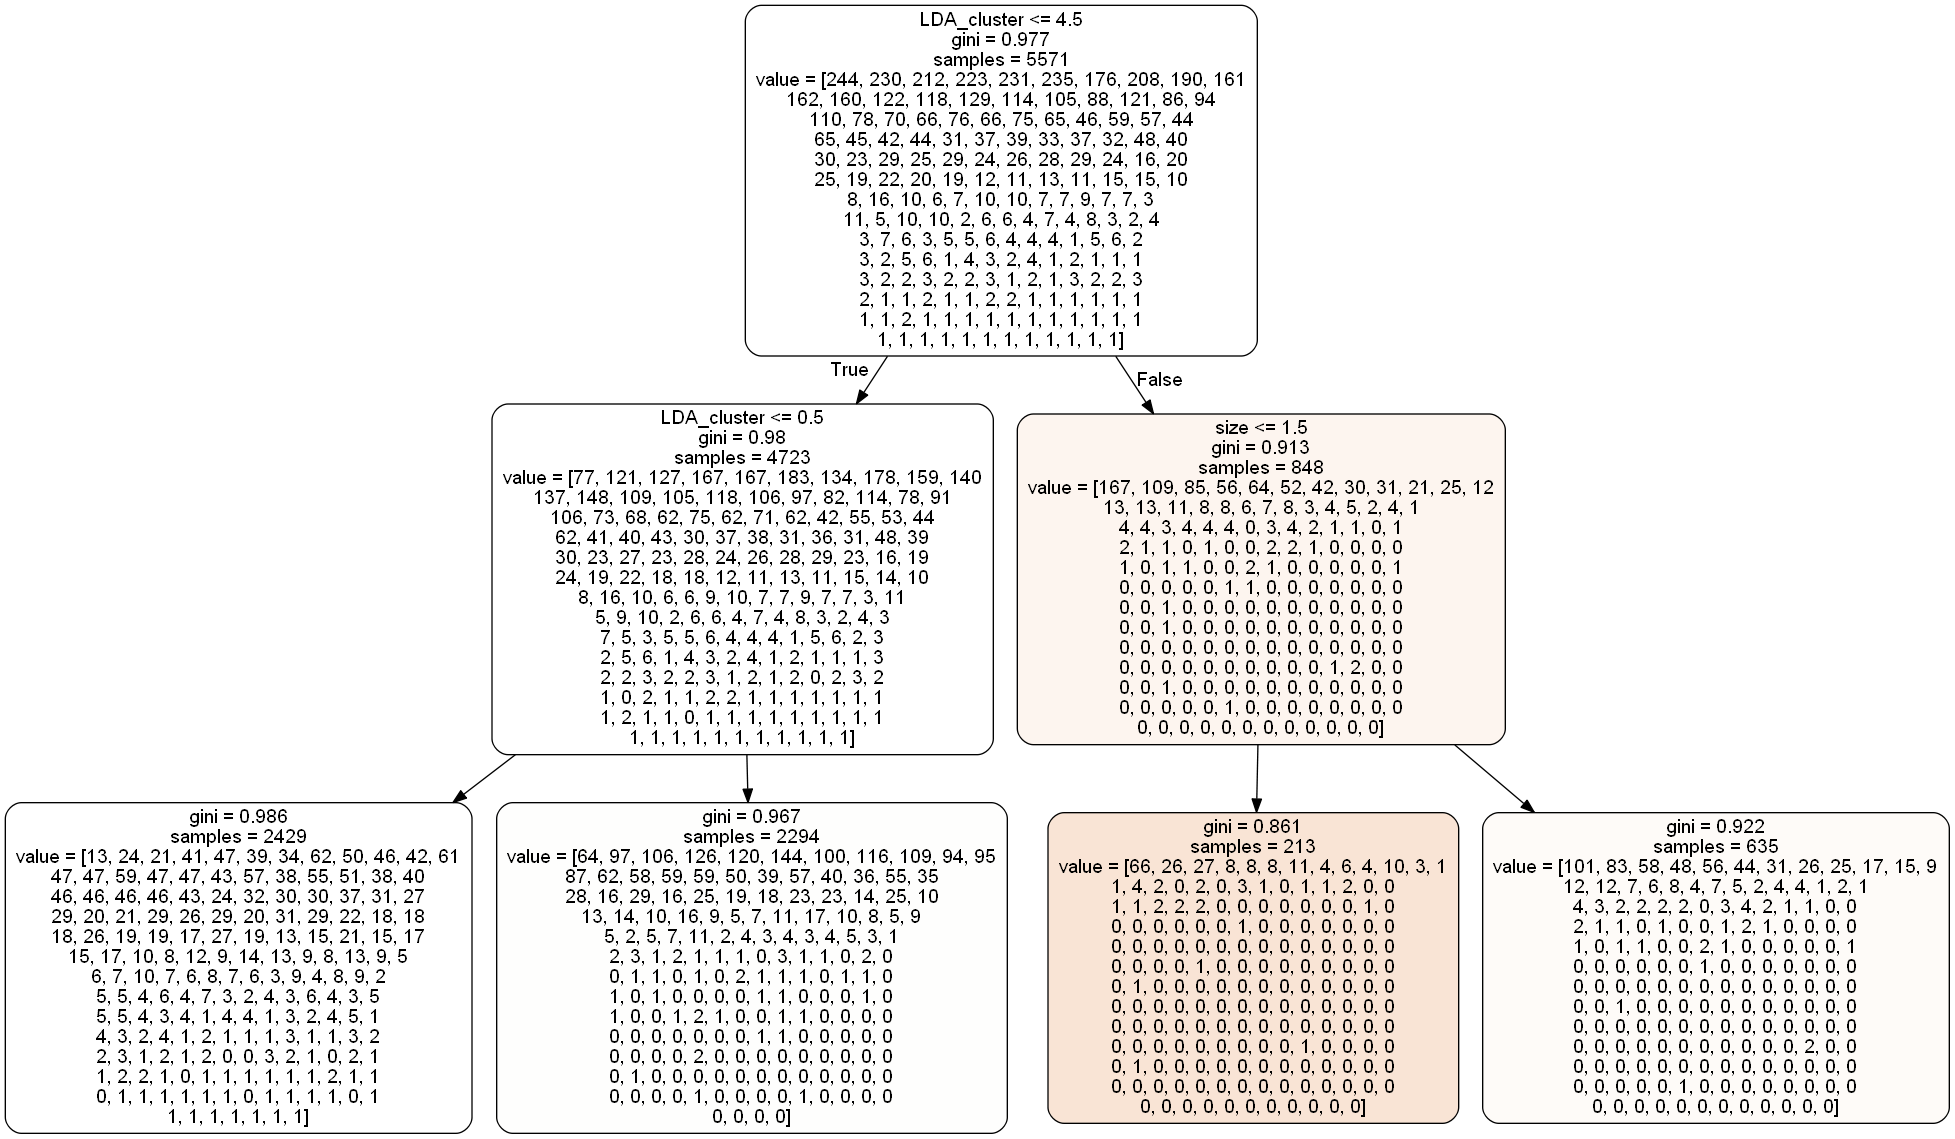

In [70]:
with open('more-comm.dot', 'w') as f:
    f = tree.export_graphviz(clf,
                            out_file=f,
                            max_depth=2,
                            impurity=True,
                            feature_names=list(X_train),
#                             class_names=['less', 'more'],
                            rounded=True,
                            filled=True)

from subprocess import check_call
#下面这句的第一个参数一定要用绝对路径，答案来自@昨夜今晨的第一条评论
check_call(['D:/Program Files/Graphviz2.38/bin/dot.exe', '-Tpng', 'more-comm.dot', '-o', 'more-comm.png'])
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
img = Image.open('more-comm.png')
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage('output.png')

In [71]:
test_rec = X_test.iloc[1000,:]    #iloc[1,:]的意思是第1行，所有列
clf.predict([test_rec])

array([7], dtype=int64)

In [72]:
y_test.iloc[1000]

28

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.0630048465266559